In [1]:
import numpy as np
from sklearn.decomposition import FastICA, PCA
import glob
import shutil
from scipy.io import loadmat
from ReClass import Subject, TSModel
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.pyplot import figure

Using TensorFlow backend.


In [2]:
subjects = [] #Creating a list of Subject classes to keep track of participant information
  
#separate the .mat files needed from the directories
subjectData = sorted(glob.glob('/content/drive/My Drive/Spark-2019/AD_MCI_Data/reformated data/resting data/extracted data 30chns/rest1 1min/rec*.mat'))#+ glob.glob('rec??.mat'))
subjectData = [x[108:] for x in subjectData]
print(subjectData)

#Loop through each file and save the subjects data, state, and channels in a Class Object
for index,value in enumerate(subjectData):
    subjects.append(Subject(loadmat('/content/drive/My Drive/Spark-2019/AD_MCI_Data/reformated data/resting data/headerInfo'+value)['dx'][0],\
                            loadmat('/content/drive/My Drive/Spark-2019/AD_MCI_Data/reformated data/resting data/extracted data 30chns/rest1 1min'+value)['data'],\
                            index))
models = []
#Separate subjects into three training sets
models.append(TSModel([x for x in subjects if x.cogState == 'N']))
models.append(TSModel([x for x in subjects if x.cogState == 'MCI']))
models.append(TSModel([x for x in subjects if x.cogState == 'AD']))

['/rec1.mat', '/rec11.mat', '/rec12.mat', '/rec13.mat', '/rec14.mat', '/rec16.mat', '/rec17.mat', '/rec18.mat', '/rec19.mat', '/rec2.mat', '/rec20.mat', '/rec21.mat', '/rec22.mat', '/rec23.mat', '/rec24.mat', '/rec25.mat', '/rec3.mat', '/rec33.mat', '/rec36.mat', '/rec39.mat', '/rec4.mat', '/rec5.mat', '/rec51.mat', '/rec52.mat', '/rec53.mat', '/rec54.mat', '/rec55.mat', '/rec57.mat', '/rec6.mat', '/rec60.mat', '/rec61.mat', '/rec62.mat', '/rec66.mat', '/rec68.mat', '/rec69.mat', '/rec7.mat', '/rec70.mat', '/rec71.mat', '/rec72.mat', '/rec73.mat', '/rec74.mat', '/rec75.mat', '/rec76.mat', '/rec77.mat', '/rec78.mat', '/rec8.mat', '/rec85.mat', '/rec9.mat']


In [3]:
#Absolute path is based on where in the user's local machine the data is stored
sub = sorted(glob.glob("/content/drive/My Drive/Spark-2019/RECSEM2019/EEG Network/Sub-cof-?.txt")) + sorted(glob.glob("/content/drive/My Drive/Spark-2019/RECSEM2019/EEG Network/Sub-cof-??.txt"))
#Extract only the file name and not the full path
sub = [x[58:] for x in sub]
count = 0

#Loop through each subject's file and reorganize the correlation data into 30x30 matrices
for s in sub:
  with open("/content/drive/My Drive/Spark-2019/RECSEM2019/EEG Network/" + s, 'r') as f:
    lines = f.readlines()[2:]
    for i in range(len(lines)):
        lines[i] = [float(x) for x in lines[i].split('|')[1:-1]]
    if count == 0:
      data = [np.asarray(lines).flatten('C')]
      count += 1
    else:
      tmp = np.asarray(lines).flatten('C')
      data = np.append(data, [tmp], axis=0)
      
print(data)


[[ 1.        0.835827  0.712496 ...  0.548985  0.877313  1.      ]
 [ 1.       -0.35966   0.665589 ...  0.034155 -0.514784  1.      ]
 [ 1.       -0.586942 -0.348796 ... -0.132583 -0.146726  1.      ]
 ...
 [ 1.       -0.086969  0.037999 ... -0.30925   0.273086  1.      ]
 [ 1.        0.393127 -0.25362  ... -0.485485 -0.341258  1.      ]
 [ 1.        0.481539  0.412651 ...  0.133245  0.281413  1.      ]]


In [7]:
#Perfrom PCA and make sure the size of the matrix is still 48xn size
  pca = PCA(n_components=2)
  dataset = pca.fit_transform(data)
  print(len(dataset))

48


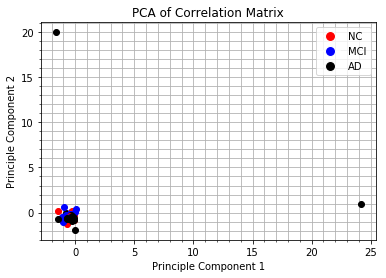

In [8]:
#Plot the newly reduced data
#Find out the index for each subject in each training group
#Each data point is colored different based on which cognitive group 
#they belong to
NC_index = [x.index for x in models[0].cogStates]
MCI_index = [x.index for x in models[1].cogStates]
AD_index = [x.index for x in models[2].cogStates]
  
  
legend_elements = [Line2D([0], [0], marker='o', color='w', label='NC',
                          markerfacecolor='r', markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='MCI',
                          markerfacecolor='b', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='AD',
                          markerfacecolor='k', markersize=10)]
  
  
plt.figure()
plt.minorticks_on()
plt.grid(True, 'both')
for i,v in enumerate(dataset):

  if i in NC_index:
    plt.plot(v[0], v[1], 'ro') 
  elif i in MCI_index:
    plt.plot(v[0], v[1], 'bo')
  elif i in AD_index:
    plt.plot(v[0], v[1], 'ko')
    
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2') #for each component
plt.title('PCA of Correlation Matrix')
plt.legend(handles=legend_elements, loc='upper right')
fig1 = plt.gcf()
plt.show()
fig1.savefig('Correlation-PCA-2.0.png', bbox_inches='tight')